In [11]:
import os
import cv2
from shutil import copyfile
from tqdm import tqdm_notebook as tqdm

## So basically 
we want to change the aspect ratio of our images to 16:9 because that's what the camera image is at

In [2]:
BG_DIR = "backgrounds"
OUT_DIR = os.path.join("backgrounds", "resize")

In [3]:
# Load our background paths
bg_paths = [x for x in os.listdir(BG_DIR) if os.path.splitext(x)[1] == ".jpg"]

TARGET_RATIO = 16/9

print("Rescaling %d images..." % len(bg_paths))
for bg_path in tqdm(bg_paths):
    bg = cv2.imread(os.path.join(BG_DIR, bg_path))
    h, w = bg.shape[:2]
    
    if round(w/h, 1) == round(TARGET_RATIO, 1):
        copyfile(os.path.join(BG_DIR, bg_path), os.path.join(OUT_DIR, bg_path))
        continue
    
    # Rotate image 90 degrees clockwise if width is less than height
    if w < h:
        bg = cv2.rotate(bg, cv2.ROTATE_90_CLOCKWISE) 
        h, w = bg.shape[:2]
    
    if w/h > TARGET_RATIO:
        new_h = int(w/TARGET_RATIO)
        
        # ignore images under 512 pixels in height
        if new_h < 512:
            continue
        bg = cv2.resize(bg, (w, new_h), interpolation=cv2.INTER_CUBIC)
    if w/h < TARGET_RATIO:
        # ignore images under 512 pixels in height
        if h < 512:
            continue
        new_w = int(h*TARGET_RATIO)
        bg = cv2.resize(bg, (new_w, h), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(os.path.join(OUT_DIR, bg_path), bg)        

print("done!")

Rescaling images...



done!


Now that everything is a 16:9 aspect ratio, let's explore our distribution of image sizes

In [4]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

%matplotlib inline

In [8]:
print("Getting image dimensions...")

bg_paths = [os.path.join(OUT_DIR, x) for x in os.listdir(OUT_DIR) if os.path.splitext(x)[1] == ".jpg"]

im_dims = []
for bg_path in tqdm(bg_paths):
    im = Image.open(bg_path) # PIL doesn't load image into memory, goes fast
    w, h = im.size
    im_dims.append({'path': bg_path, 'width': w, 'height': h})

im_dims = np.array(im_dims)
print(len(im_dims), "images")

Getting image dimensions...



18686 images


Now let's double check that all the images have a 16:9 aspect ratio

Max: 1.849609375 Min: 1.75


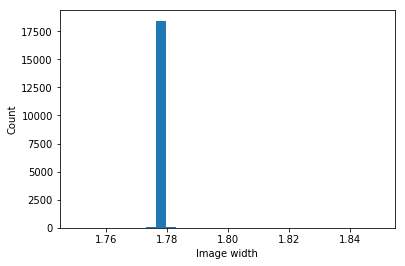

In [7]:
im_ratios = [x['width']/x['height'] for x in im_dims]
print("Max:", max(im_ratios), "Min:", min(im_ratios))

plt.hist(im_ratios, bins=30)
plt.xlabel('Image aspect ratio');
plt.ylabel('Count');
plt.show()

Sure enough, our code worked!

Now let's view the distribution of our image sizes. To do that we'll plot a histogram of image widths.

Max: 3158 Min: 400


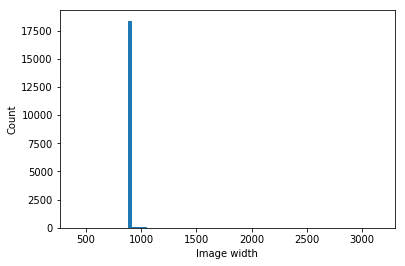

In [10]:
im_widths = [x['width'] for x in im_dims]
print("Max:", max(im_widths), "Min:", min(im_widths))

plt.hist(im_widths, bins=80)
plt.xlabel('Image width');
plt.ylabel('Count');
plt.show()

In [28]:
len(bg_widths[bg_widths>512])

15958

In [9]:
for x in im_dims:
    asp_rat = x['width']/x['height']
    if round(asp_rat, 1) != round(16/9, 1):
        print(x['path'], asp_rat)

backgrounds/resize/Places365_val_00017699.jpg 0.562019758507135
backgrounds/resize/Places365_val_00023396.jpg 0.562019758507135
backgrounds/resize/Places365_val_00026954.jpg 0.562019758507135
backgrounds/resize/Places365_val_00031760.jpg 0.5632563256325632
backgrounds/resize/Places365_val_00007094.jpg 0.5638766519823789
backgrounds/resize/Places365_val_00023043.jpg 0.5601750547045952
backgrounds/resize/Places365_val_00007031.jpg 0.562019758507135
backgrounds/resize/Places365_val_00023874.jpg 0.562019758507135
backgrounds/resize/Places365_val_00008842.jpg 0.5614035087719298
backgrounds/resize/Places365_val_00031742.jpg 0.5707915273132664
backgrounds/resize/Places365_val_00004454.jpg 0.562429696287964
backgrounds/resize/Places365_val_00010718.jpg 0.5614035087719298
backgrounds/resize/Places365_val_00015298.jpg 0.5638766519823789
backgrounds/resize/Places365_val_00023557.jpg 0.562019758507135
backgrounds/resize/Places365_val_00019729.jpg 0.5663716814159292
backgrounds/resize/Places365_val